**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [6]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

# added by me to solve the error 'module 'keras.utils' has no attribute 'to_categorical''
from keras.utils import np_utils

# Data Preprocessing

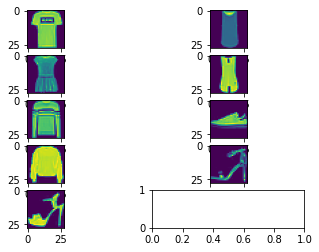

In [17]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# x_train= x_train.reshape(60000,28,28)
x_train= x_train.reshape(60000,28,28,1)

# x_test= x_test.reshape(x_test.shape[0],28,28)
x_test= x_test.reshape(x_test.shape[0],28,28,1) # reshaped to resolve error encunterd while fitting

input_shape=(28,28,1)

y_train=keras.utils.np_utils.to_categorical(y_train,10)

y_test=keras.utils.np_utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

# Build CNN Model

In [18]:
x_train /= 255
x_test /=255
model = None  #Initialize model here
epochs = 5
batch_size = 64
'''
Define batch size of 64 , 
No of classes (interpret from data)
Train for 5 epochs

'''

def build_model(optimizer): 

  '''
  Define a sequential model with categorical cross entropy as loss function consisting
  2 convolution and 2 pooling layers with relu as activation function followed by
  droput -> flatten -> dense -> dropout -> dense

  Convolution layer - (kernel size = (3*3))
  Pooling layer - (pool size = (2*2))

  '''

  #****** INSERT MODEL CODE HERE ******
  model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(10,activation='softmax')
  ])
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])
  model.summary()

  return model 

#**** call build model with RMSprop and SGDOptimizer Optimizer ****
model = build_model('Adam')

plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test)) 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

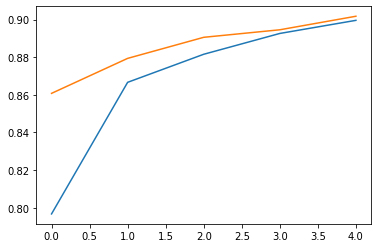

In [19]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

# Predict Image

[[1.86617341e-04 5.34295305e-06 9.64825565e-04 1.05820895e-04
  8.83492827e-02 5.05907883e-06 9.09777999e-01 6.73951604e-07
  6.01304986e-04 3.14874865e-06]]
Shirt


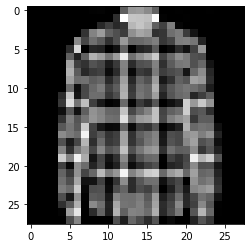

In [20]:
keras.models.save_model(model, "mnist.h5", save_format="h5")

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):

  '''
  Reshape the image into (1,28,28)
  predict the answer and print it

  '''
  #**** Insert code here ****
  img = img.reshape(1,28,28,1)
  prediction = model.predict(img)
  print(prediction)
  pred_index = np.argmax(prediction)
  print(labels[pred_index])


m = load_model('mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')
